# Introduction

I would like to analyse the sentiment scores of speakers during the debates. I will figure out the **polarity** "how positive or negative a word" and **subjectivity** "how subjective or opinionated a word is. The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. 

I will walk through;

1. Sentiment of Routine
2. Sentiment Analysis with Afinn Lexicon
3. Sentiment Analysis with TextBlob
4. Model Evaluation


# Importing Libraries

In [ ]:
#!pip install afinn

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from afinn import Afinn
af = Afinn()

pd.set_option('max_colwidth',60)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Sentiment of Routine 
Let's find the polarity and subjectivity values for each politician.

**Polarity :** -1 is very negative, +1 is very positive.     
**Subjectivity :** 0 is fact, +1 is much opinion.

### 1st Presidential Debate

In [ ]:
first_corpus = pd.read_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/first_whole_corpus.pkl")
first_corpus = first_corpus.iloc[[0,2]]
first_corpus["speaker"] = ["Donald Trump","Joe Biden"]
first_corpus

,transcript,speech_time,clean_text,speaker
Donald Trump,"How are you doing?, Thank you very much, Chris. I will t...",36.0,thank much chris tell simply win election election conse...,Donald Trump
Joe Biden,"How you doing, man?, I’m well., Well, first of all, than...",28.0,man well well first thank look forward mr president amer...,joe Biden


In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

first_corpus['polarity'] = first_corpus['transcript'].apply(pol)
first_corpus['subjectivity'] = first_corpus['transcript'].apply(sub)

first_corpus

,transcript,speech_time,clean_text,speaker,polarity,subjectivity
Donald Trump,"How are you doing?, Thank you very much, Chris. I will t...",36.0,thank much chris tell simply win election election conse...,Donald Trump,0.074640,0.444264
Joe Biden,"How you doing, man?, I’m well., Well, first of all, than...",28.0,man well well first thank look forward mr president amer...,joe Biden,0.113939,0.468481


It seems both politicians tried to be neutral, Joe Biden's speech was more positive than Donald Trump with little difference. 
Subjectivity score of both politicians are similar to each other. 

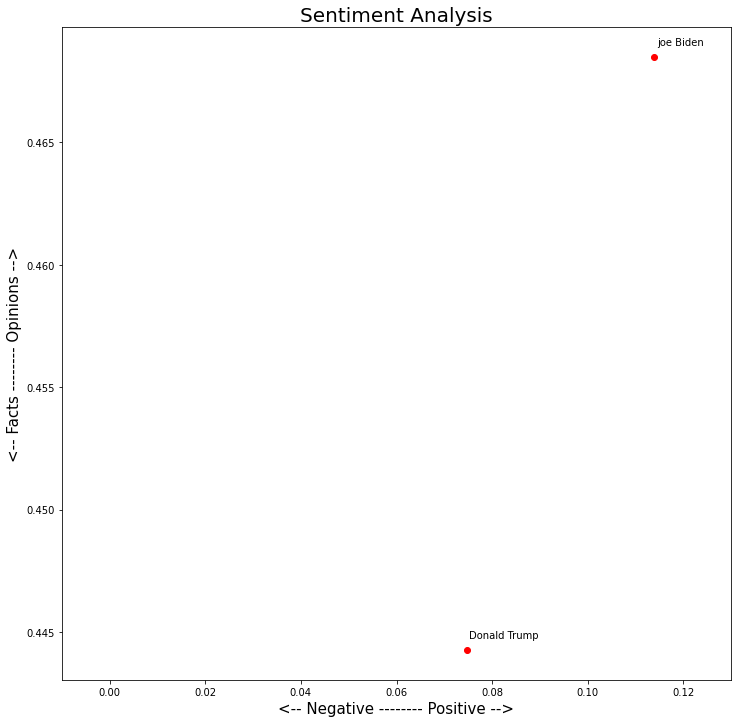

In [ ]:
# Let's plot the polarity and subjectivity values of each speaker

plt.rcParams['figure.figsize'] = [12,12]

for index, speaker in enumerate(first_corpus.index):
    x = first_corpus.polarity.loc[speaker]
    y = first_corpus.subjectivity.loc[speaker]
    plt.scatter(x, y, color='red')
    plt.text(x+.0005, y+.0005, first_corpus.loc[["Donald Trump","Joe Biden"]]["speaker"][index], fontsize=10)
    plt.xlim(-.01, .13,) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts


def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
first_corpus

,transcript,speech_time,clean_text,speaker,polarity,subjectivity
Donald Trump,"How are you doing?, Thank you very much, Chris. I will t...",36.0,thank much chris tell simply win election election conse...,Donald Trump,0.074640,0.444264
Joe Biden,"How you doing, man?, I’m well., Well, first of all, than...",28.0,man well well first thank look forward mr president amer...,joe Biden,0.113939,0.468481


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in first_corpus["transcript"]:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['How are you doing?, Thank you very much, Chris. I will tell you very simply. We won the election. Elections have consequences. We have the Senate, we have the White House, and we have a phenomenal nominee respected by all. Top, top academic, good in every way. Good in every way. In fact, some of her biggest endorsers are very liberal people from Notre Dame and other places. So I think she’s going to be fantastic. We have plenty of time. Even if we did it after the election itself. I have a lot of time after the election, as you know. So I think that she will be outstanding. She’s going to be as good as anybody that has served on that court. We really feel that. We have a professor at Notre Dame, highly respected by all, said she’s the single greatest student he’s ever had. He’s been a professor for a long time at a great school., And we won the election and therefore we have the right to choose her, and very few people knowingly would say otherwise. And by the way, the Democrats, th

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

2

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.15453216374269002,
  0.036173859810223453,
  0.10466774280333603,
  0.014403644086742686,
  0.052076790312084446,
  0.12124126984126982,
  -0.022252615440115427,
  0.12953680897646414,
  0.05988322377211266,
  0.11148944805194809],
 [0.20855943152454784,
  0.12962962962962965,
  0.13991935483870965,
  0.13761904761904764,
  0.052741894630192514,
  0.09108527131782947,
  0.0005522486772486698,
  0.09916619020392606,
  0.1337685364281109,
  0.275]]

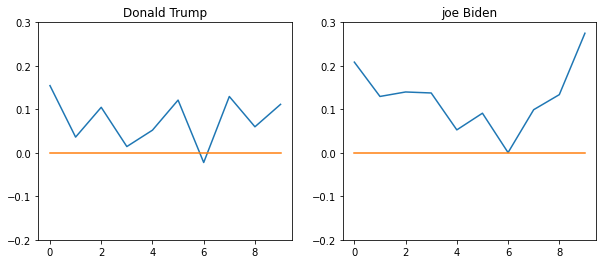

In [ ]:
# Show the plot for Donald Trump and Joe Biden
plt.rcParams['figure.figsize'] = [10,4]

for index, speaker in enumerate(first_corpus.index):    
    plt.subplot(1, 2, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(first_corpus["speaker"][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Both politicians talked positively throught the debate. There is one negative part in Trump's speech. What interesting here is Joe Biden started more positively, there there was decrease and again positivity score started to increase towords to the end of debate.

### 2nd Presidential Debate

In [ ]:
second_corpus = pd.read_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/second_whole_corpus.pkl")
second_corpus = second_corpus.iloc[[0,2]]
second_corpus["speaker"] = ["Donald Trump","joe Biden"]
second_corpus

,transcript,speech_time,clean_text,speaker
Donald Trump,"How are you doing? How are you?, So as you know, 2.2 mil...",31.0,know million people model expect die close great economy...,Donald Trump
Joe Biden,"220,000 Americans dead. You hear nothing else I say toni...",21.0,americans dead hear nothing else say tonight hear anyone...,joe Biden


In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

second_corpus['polarity'] = second_corpus['transcript'].apply(pol)
second_corpus['subjectivity'] = second_corpus['transcript'].apply(sub)

second_corpus

,transcript,speech_time,clean_text,speaker,polarity,subjectivity
Donald Trump,"How are you doing? How are you?, So as you know, 2.2 mil...",31.0,know million people model expect die close great economy...,Donald Trump,0.072720,0.459719
Joe Biden,"220,000 Americans dead. You hear nothing else I say toni...",21.0,americans dead hear nothing else say tonight hear anyone...,joe Biden,0.107606,0.439476


It seems both politicians tried to be neutral, Joe Biden's speech was more positive than Donald Trump with little difference. 
Subjectivity score of both politicians are similar to each other. 

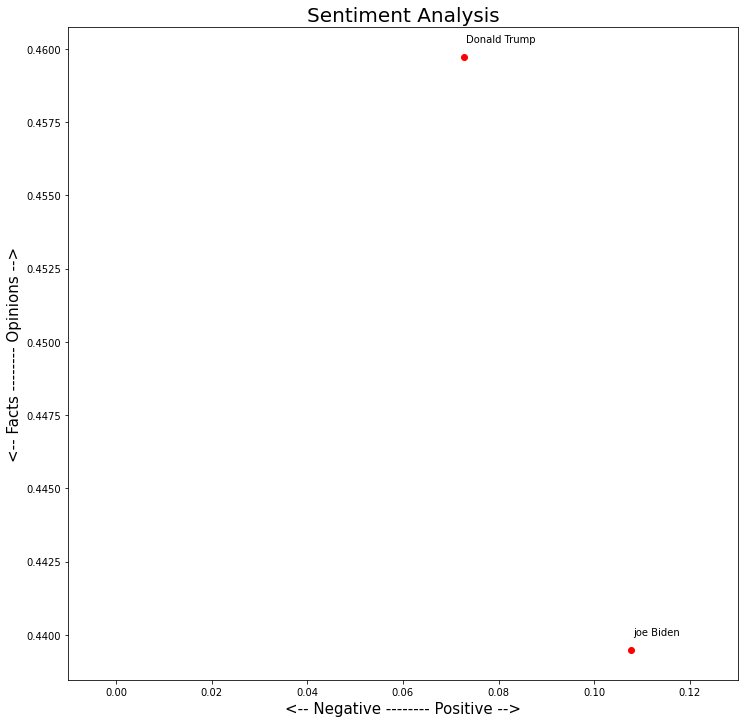

In [ ]:
# Let's plot the polarity and subjectivity values of each speaker

plt.rcParams['figure.figsize'] = [12,12]

for index, speaker in enumerate(second_corpus.index):
    x = second_corpus.polarity.loc[speaker]
    y = second_corpus.subjectivity.loc[speaker]
    plt.scatter(x, y, color='red')
    plt.text(x+.0005, y+.0005, second_corpus["speaker"][index], fontsize=10)
    plt.xlim(-.01, .13,) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Let's take a look at our data again
second_corpus

,transcript,speech_time,clean_text,speaker,polarity,subjectivity
Donald Trump,"How are you doing? How are you?, So as you know, 2.2 mil...",31.0,know million people model expect die close great economy...,Donald Trump,0.072720,0.459719
Joe Biden,"220,000 Americans dead. You hear nothing else I say toni...",21.0,americans dead hear nothing else say tonight hear anyone...,joe Biden,0.107606,0.439476


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in second_corpus["transcript"]:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['How are you doing? How are you?, So as you know, 2.2 million people modeled out, were expected to die. We closed up the greatest economy in the world in order to fight this horrible disease that came from China. It’s a worldwide pandemic. It’s all over the world. You see the spikes in Europe and many other places right now. If you notice, the mortality rate is down 85%. The excess mortality rate is way down and much lower than almost any other country. And we’re fighting it and we’re fighting it hard. There is a spike. There was a spike in Florida and it’s now gone., There was a very big spike in Texas. It’s now gone. There was a very big spike in Arizona. It’s now gone. And there was some spikes and surges and other places, they will soon be gone. We have a vaccine that’s coming. It’s ready. It’s going to be announced within weeks. And it’s going to be delivered. We have Operation Warp Speed, which is the military is going to distribute the vaccine., I can tell you from personal ex

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10826892109500805,
  0.06328655406524258,
  0.14151404151404157,
  -0.0730103114478114,
  0.14788545173961842,
  0.15604834054834052,
  -0.08576183917093007,
  -0.004543314500941618,
  0.10416955266955269,
  0.12806642817059483],
 [0.0870642013353878,
  0.1141607977428873,
  0.005022755022755034,
  0.04865862457325872,
  0.16381027253668765,
  0.06210754158122579,
  0.0640079365079365,
  0.14208937198067637,
  0.15346655928051275,
  0.19795630725863284]]

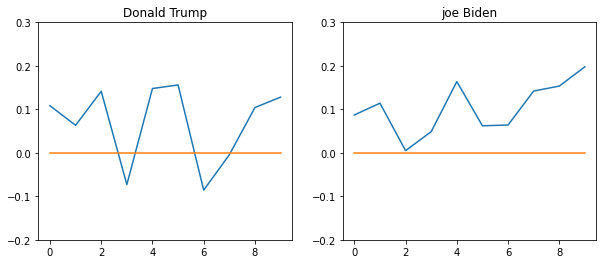

In [ ]:
# Show the plot for Donald Trump and Joe Biden
plt.rcParams['figure.figsize'] = [10,4]

for index, speaker in enumerate(second_corpus.index):    
    plt.subplot(1, 2, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(second_corpus["speaker"][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Overall sentiment score of both politicians are positive and similar to the first debate. Except from the first debate, there are more negative sentiment scores,different patterns for Donald Trump. Speech of Joe Biden was more positive. Although the negative,down pattern his positivity score increased throught the debate.

## Sentiment Analysis with Afinn Lexicon

The AFINN lexicon is  one of the simplest and most popular lexicons that can be used for sentiment analysis.
The AFINN lexicon contains over 3K+ words with a polarity score for each word. You can find this lexicon at the author’s <a href="https://github.com/fnielsen/afinn/tree/master/afinn/data">official GitHub repository</a>.
There is also a library called ***afinn***, that I will use for analysis.


### 1st Presidential Debate

In [ ]:
first_debate=pd.read_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/first_debate_corpus.pkl")
first_debate = first_debate[(first_debate['speaker']== "Joe Biden") | (first_debate['speaker']== "Donald Trump")]
first_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text
2,Joe Biden,169,2,0:02:49,39.0,"How you doing, man?",man
3,Donald Trump,171,2,0:02:51,2.0,How are you doing?,
4,Joe Biden,171,2,0:02:51,0.0,I’m well.,well
6,Donald Trump,241,4,0:04:01,50.0,"Thank you very much, Chris. I will tell you very simply....",thank much chris tell simply win election election conse...
7,Donald Trump,293,4,0:04:53,52.0,And we won the election and therefore we have the right ...,win election therefore right choose people knowingly wou...


In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(speech) for speech in first_debate['text']]
sentiment_category_1 = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [ ]:
first_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text
2,Joe Biden,169,2,0:02:49,39.0,"How you doing, man?",man
3,Donald Trump,171,2,0:02:51,2.0,How are you doing?,
4,Joe Biden,171,2,0:02:51,0.0,I’m well.,well
6,Donald Trump,241,4,0:04:01,50.0,"Thank you very much, Chris. I will tell you very simply....",thank much chris tell simply win election election conse...
7,Donald Trump,293,4,0:04:53,52.0,And we won the election and therefore we have the right ...,win election therefore right choose people knowingly wou...


In [ ]:
# sentiment statistics per news category
df_af = pd.DataFrame([list(first_debate['speaker']), sentiment_scores, sentiment_category_1]).T
df_af.columns = ['speaker', 'sentiment_score', 'sentiment_category']
df_af['sentiment_score'] = df_af.sentiment_score.astype('float')
df_af.groupby(by=['speaker']).describe()

sentiment_score                                                
                       count      mean       std   min  25%  50%   75%   max
speaker                                                                     
Donald Trump           314.0  0.117834  3.406740 -15.0  0.0  0.0  0.75  37.0
Joe Biden              249.0  0.200803  3.955376 -22.0  0.0  0.0  2.00  23.0

We can see according to the mean of sentiment scores Joe Biden's speech is more positive than Donald Trump's with little difference.

In [ ]:
df_af.head()

,speaker,sentiment_score,sentiment_category
0,Joe Biden,0.0,neutral
1,Donald Trump,0.0,neutral
2,Joe Biden,0.0,neutral
3,Donald Trump,37.0,positive
4,Donald Trump,2.0,positive


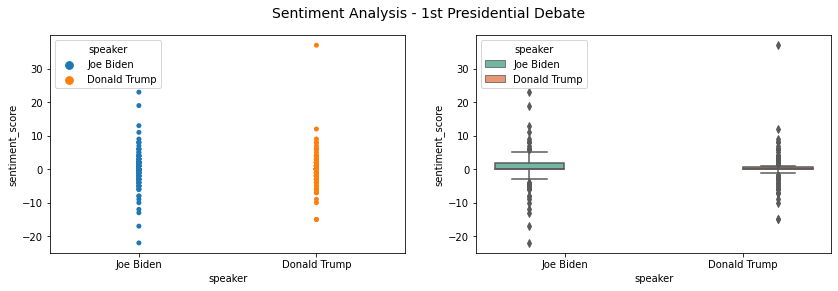

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='speaker', y="sentiment_score", 
                   hue='speaker',jitter = False, data=df_af, ax=ax1)
bp = sns.boxplot(x='speaker', y="sentiment_score", 
                 hue='speaker', data=df_af, palette="Set2", ax=ax2)
t = f.suptitle('Sentiment Analysis - 1st Presidential Debate', fontsize=14)

We can see that most positive sentence belongs to Donald Trump and most negative sentence belongs to Joe Biden. Additionaly spread of sentiment score of Joe Biden is more higher however sentiment polarity of Donald Trump's sentences are in a small range, close to each other. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


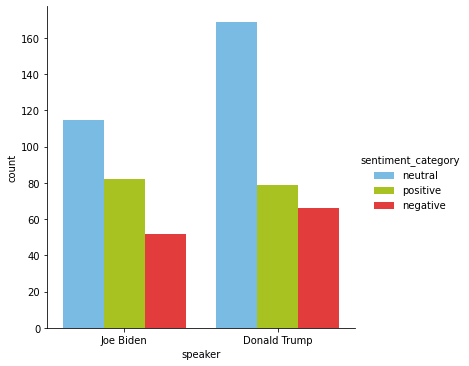

In [ ]:
fc = sns.factorplot(x="speaker", hue="sentiment_category", 
                    data=df_af, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

* Donald Trump has more negative and neutral sentences than Joe Biden.

In [ ]:
print("Most positive sentiment score of Donald Trump is:",(df_af[df_af["speaker"]=="Donald Trump"]["sentiment_score"].max()))
print("Most negative sentiment score of Donald Trump is:",(df_af[df_af["speaker"]=="Donald Trump"]["sentiment_score"].min()))

print("Most positive sentiment score of Joe Biden is:",(df_af[df_af["speaker"]=="Joe Biden"]["sentiment_score"].max()))
print("Most negative sentiment score of Joe Biden is:",(df_af[df_af["speaker"]=="Joe Biden"]["sentiment_score"].min()))

Most positive sentiment score of Donald Trump is: 37.0
Most negative sentiment score of Donald Trump is: -15.0
Most positive sentiment score of Joe Biden is: 23.0
Most negative sentiment score of Joe Biden is: -22.0


* Most positive and negative sentences of Donald Trump.

In [ ]:
pos_idx = df_af[(df_af.speaker=='Donald Trump') & (df_af.sentiment_score == 37)].index[0]
neg_idx = df_af[(df_af.speaker=='Donald Trump') & (df_af.sentiment_score == -15)].index[0]

print('*Most Negative Speech of Donald Trump:*', first_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Donald Trump:*', first_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Donald Trump:* If we would’ve listened to you, the country would have been left wide open, millions of people would have died, not 200,000. And one person is too much. It’s China’s fault. It should have never happened. They stopped it from going in, but it was China’s fault. And, by the way, when you talk about numbers, you don’t know how many people died in China. You don’t know how many people died in Russia. You don’t know how many people died in India. They don’t exactly give you a straight count, just so you understand. But if you look at what we’ve done, I closed it and you said, “He’s xenophobic. He’s a racist and he’s xenophobic,” because you didn’t think I should have closed our country. Wait a minute.

*Most Positive Speech of Donald Trump:* Thank you very much, Chris. I will tell you very simply. We won the election. Elections have consequences. We have the Senate, we have the White House, and we have a phenomenal nominee respected by all. Top, top a

In [ ]:
df_af[df_af["speaker"]=="Joe Biden"]["sentiment_score"].sort_values()

117   -22.0
357   -17.0
396   -13.0
557   -12.0
440   -10.0
       ... 
144     9.0
16     11.0
9      13.0
526    19.0
8      23.0
Name: sentiment_score, Length: 249, dtype: float64

In [ ]:
df_af[df_af["speaker"]=="Donald Trump"]["sentiment_score"].sort_values()

125   -15.0
372   -15.0
204   -10.0
529    -9.0
371    -7.0
       ... 
527     8.0
225     8.0
439     9.0
438    12.0
3      37.0
Name: sentiment_score, Length: 314, dtype: float64

* Most positive and negative sentences of Joe Biden.

In [ ]:
pos_idx = df_af[(df_af.speaker=='Joe Biden') & (df_af.sentiment_score == 23)].index[0]
neg_idx = df_af[(df_af.speaker=='Joe Biden') & (df_af.sentiment_score == -22)].index[0]

print('*Most Negative Speech of Joe Biden:*', first_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Joe Biden:*', first_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Joe Biden:* Good luck. 200,000 dead. As you said, over seven million infected in the United States. We, in fact, have 4% of the world’s population, 20% of the deaths. 40,000 people a day are contracting COVID. In addition to that, about between 750 and 1000 people a day are dying. When he was presented with that number, he said, “It is what it is.” Well, it is what it is because you are who you are. That’s why it is. The President has no plan. He hasn’t laid out anything. He knew all the way back in February how serious this crisis was. He knew it was a deadly disease. What did he do? He’s on tape as acknowledging he knew it. He said he didn’t tell us or give people a warning of it because he didn’t want to panic the American people. You don’t panic. He panicked. In addition to that, what did he do?

*Most Positive Speech of Joe Biden:* Now, what’s at stake here is the President’s made it clear, he wants to get rid of the Affordable Care Act. He’s been running 

### 2nd Presidential Debate

In [ ]:
second_debate=pd.read_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/second_debate_corpus.pkl")
second_debate = second_debate[(second_debate['speaker']== "Joe Biden") | (second_debate['speaker']== "Donald Trump")]
second_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text
1,Donald Trump,457,7,0:07:37,439.0,How are you doing? How are you?,
5,Donald Trump,544,9,0:09:04,1.0,"So as you know, 2.2 million people modeled out, were exp...",know million people model expect die close great economy...
6,Donald Trump,581,9,0:09:41,37.0,There was a very big spike in Texas. It’s now gone. Ther...,big spike texas go big spike arizona go spike surge plac...
7,Donald Trump,604,10,0:10:04,23.0,"I can tell you from personal experience, I was in the ho...",tell personal experience hospital get well tell somethin...
9,Joe Biden,673,11,0:11:13,7.0,"220,000 Americans dead. You hear nothing else I say toni...",americans dead hear nothing else say tonight hear anyone...


In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(speech) for speech in second_debate['text']]
sentiment_category_2 = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [ ]:
# sentiment statistics per news category
df_af2 = pd.DataFrame([list(second_debate['speaker']), sentiment_scores, sentiment_category_2]).T
df_af2.columns = ['speaker', 'sentiment_score', 'sentiment_category']
df_af2['sentiment_score'] = df_af2.sentiment_score.astype('float')
df_af2.groupby(by=['speaker']).describe()

sentiment_score                                               
                       count      mean       std   min  25%  50%  75%   max
speaker                                                                    
Donald Trump           190.0 -0.194737  4.855475 -21.0 -2.0  0.0  0.0  41.0
Joe Biden              133.0 -0.586466  4.729225 -21.0 -1.0  0.0  1.0  12.0

Speech of Joe Biden at second debate looks like more negative than Donald Trump's. Both politician has same sentiment score for negative sentences and Donald Trump has most positive score.

In [ ]:
df_af2.head()

,speaker,sentiment_score,sentiment_category
0,Donald Trump,0.0,neutral
1,Donald Trump,-10.0,negative
2,Donald Trump,2.0,positive
3,Donald Trump,2.0,positive
4,Joe Biden,-4.0,negative


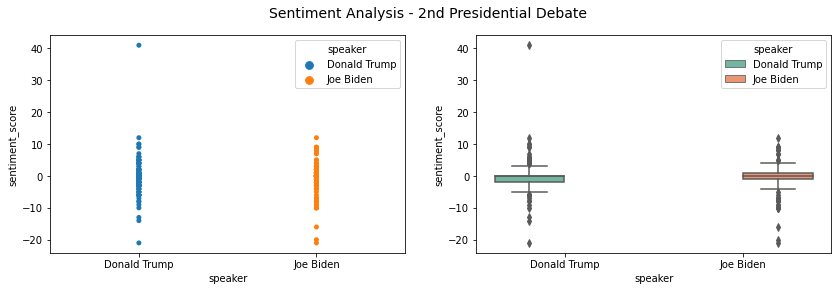

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='speaker', y="sentiment_score", 
                   hue='speaker',jitter = False, data=df_af2, ax=ax1)
bp = sns.boxplot(x='speaker', y="sentiment_score", 
                 hue='speaker', data=df_af2, palette="Set2", ax=ax2)
t = f.suptitle('Sentiment Analysis - 2nd Presidential Debate', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


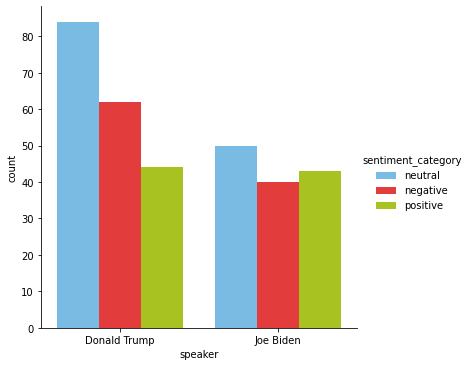

In [ ]:
fc = sns.factorplot(x="speaker", hue="sentiment_category", 
                    data=df_af2, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

It is interesting that mean score of sentences for Joe Biden looks more negative than Donald Trump's. However number of negative sentences of Donald Trump is more than Joe Biden's.

In [ ]:
print("Most positive sentiment score of Donald Trump is:",(df_af2[df_af2["speaker"]=="Donald Trump"]["sentiment_score"].max()))
print("Most negative sentiment score of Donald Trump is:",(df_af2[df_af2["speaker"]=="Donald Trump"]["sentiment_score"].min()))

print("Most positive sentiment score of Joe Biden is:",(df_af2[df_af2["speaker"]=="Joe Biden"]["sentiment_score"].max()))
print("Most negative sentiment score of Joe Biden is:",(df_af2[df_af2["speaker"]=="Joe Biden"]["sentiment_score"].min()))

Most positive sentiment score of Donald Trump is: 41.0
Most negative sentiment score of Donald Trump is: -21.0
Most positive sentiment score of Joe Biden is: 12.0
Most negative sentiment score of Joe Biden is: -21.0


* Most positive and negative speech of Donald Trump.

In [ ]:
pos_idx = df_af2[(df_af2.speaker=='Donald Trump') & (df_af2.sentiment_score == 41)].index[0]
neg_idx = df_af2[(df_af2.speaker=='Donald Trump') & (df_af2.sentiment_score == -21)].index[0]

print('*Most Negative Speech of Donald Trump:*', second_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Donald Trump:*', second_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Donald Trump:* And frankly, he ran the H1N1 swine flu and it was a total disaster. Far less lethal, but it was a total disaster. Had that had this kind of numbers, 700,000 people would be dead right now, but it was a far less lethal disease. Look, his own person who ran that for him, who, as you know, was his chief of staff said, “It was catastrophic. It was horrible. We didn’t know what we were doing.” Now he comes up and he tells us how to do this.

*Most Positive Speech of Donald Trump:* Pre-existing conditions will always stay. What I would like to do is a much better healthcare, much better. We’ll always protect people with pre-existing. So I’d like to terminate Obamacare, come up with a brand new, beautiful healthcare. The Democrats will do it, because there’ll be tremendous pressure on them. And we might even have the House by that time. And I think we’re going to win the House. You’ll see, but I think we’re going to win the House. But come up with a bet

* Most positive and negative speech of Joe Biden.

In [ ]:
pos_idx = df_af2[(df_af2.speaker=='Joe Biden') & (df_af2.sentiment_score == 12)].index[0]
neg_idx = df_af2[(df_af2.speaker=='Joe Biden') & (df_af2.sentiment_score == -21)].index[0]

print('*Most Negative Speech of Joe Biden:*', second_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Joe Biden:*', second_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Joe Biden:* My response is that think about what the President knew in January and didn’t tell the American people. He was told this was a serious virus that spread in the air, and it was much worse, much worse, than the flu. He went on record and said to one of your colleagues, recorded, that in fact he knew how dangerous it was but he didn’t want to tell us. He didn’t want to tell us because he didn’t want us to panic. He didn’t want us… Americans don’t panic. He panicked. But guess what, in the meantime, we find out in the New York Times the other day, that in fact his folks went to Wall Street and said, “This is a really dangerous thing.” And a memo out of that meeting — not from his administration, but from some of the brokers — said, “Sell short, because we’ve got to get moving. It’s a dangerous problem.”

*Most Positive Speech of Joe Biden:* Making sure that you, in fact, if you get pulled over just, yes, sir, no, sir. Hands on top of the wheel. Because 

In [ ]:
df_af2[df_af2["speaker"]=="Donald Trump"]["sentiment_score"].sort_values()

13    -21.0
193   -14.0
34    -13.0
1     -10.0
102    -9.0
       ... 
274     9.0
262    10.0
204    10.0
160    12.0
123    41.0
Name: sentiment_score, Length: 190, dtype: float64

In [ ]:
df_af2[df_af2["speaker"]=="Joe Biden"]["sentiment_score"].sort_values()

42    -21.0
206   -20.0
21    -16.0
228   -10.0
146   -10.0
       ... 
17      8.0
112     9.0
321     9.0
166     9.0
202    12.0
Name: sentiment_score, Length: 133, dtype: float64

## Sentiment Analysis with TextBlob

**TextBlob** is another excellent open-source library for performing NLP tasks with ease, including **sentiment analysis**. It also an a **sentiment lexicon** (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. Typically, the scores have a normalized scale as compare to Afinn. The **polarity** score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

### 1st Presidential Debate

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(speech).sentiment.polarity, 3) for speech in first_debate['text']]
sentiment_category_tb_1 = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [ ]:
first_debate

,speaker,seconds,minutes,hour,duration,text,clean_text
2,Joe Biden,169,2,0:02:49,39.0,"How you doing, man?",man
3,Donald Trump,171,2,0:02:51,2.0,How are you doing?,
4,Joe Biden,171,2,0:02:51,0.0,I’m well.,well
6,Donald Trump,241,4,0:04:01,50.0,"Thank you very much, Chris. I will tell you very simply....",thank much chris tell simply win election election conse...
7,Donald Trump,293,4,0:04:53,52.0,And we won the election and therefore we have the right ...,win election therefore right choose people knowingly wou...
...,...,...,...,...,...,...,...
780,Donald Trump,5672,94,1:34:32,37.0,It’s already been established. Take a look at Carolyn Ma...,already establish take look carolyn maloneys race
782,Joe Biden,5680,94,1:34:40,5.0,He has no idea what he’s talking about. Here’s the deal....,no idea talk deal fact accept know winner declare ballot...
783,Donald Trump,5706,95,1:35:06,26.0,I want to see an honest ballot cut-,want see honest ballot cut
785,Donald Trump,5712,95,1:35:12,4.0,I want to see an honest ballot count.,want see honest ballot count


In [ ]:
# sentiment statistics per news category
df_tb = pd.DataFrame([list(first_debate['speaker']), sentiment_scores_tb, sentiment_category_tb_1]).T
df_tb.columns = ['speaker', 'sentiment_score', 'sentiment_category']
df_tb['sentiment_score'] = df_tb.sentiment_score.astype('float')
df_tb.groupby(by=['speaker']).describe()

sentiment_score                                              
                       count      mean       std  min  25%  50%   75%  max
speaker                                                                   
Donald Trump           314.0  0.043127  0.228111 -1.0  0.0  0.0  0.10  1.0
Joe Biden              249.0  0.067618  0.233280 -1.0  0.0  0.0  0.15  0.8

Average sentiment score of two politician are close to each other, Joe Biden is more positive with little difference.

In [ ]:
df_tb.head()

,speaker,sentiment_score,sentiment_category
0,Joe Biden,0.000,neutral
1,Donald Trump,0.000,neutral
2,Joe Biden,0.000,neutral
3,Donald Trump,0.344,positive
4,Donald Trump,0.062,positive


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


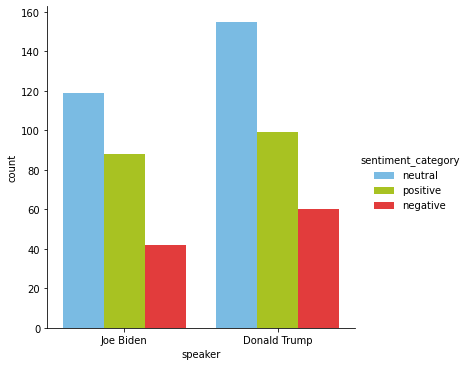

In [ ]:
#sentiment frequency distribution per news category
fc = sns.factorplot(x="speaker", hue="sentiment_category", 
                    data=df_tb, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

* Donald Trump has more neutral and negative sentences apparently.

In [ ]:
print("Most positive sentiment score of Donald Trump is:",(df_tb[df_tb["speaker"]=="Donald Trump"]["sentiment_score"].max()))
print("Most negative sentiment score of Donald Trump is:",(df_tb[df_tb["speaker"]=="Donald Trump"]["sentiment_score"].min()))

print("Most positive sentiment score of Joe Biden is:",(df_tb[df_tb["speaker"]=="Joe Biden"]["sentiment_score"].max()))
print("Most negative sentiment score of Joe Biden is:",(df_tb[df_tb["speaker"]=="Joe Biden"]["sentiment_score"].min()))

Most positive sentiment score of Donald Trump is: 1.0
Most negative sentiment score of Donald Trump is: -1.0
Most positive sentiment score of Joe Biden is: 0.8
Most negative sentiment score of Joe Biden is: -1.0


* Most positive and negative speech of Donald Trump.

In [ ]:
pos_idx = df_tb[(df_tb.speaker=='Donald Trump') & (df_tb.sentiment_score == 1)].index[0]
neg_idx = df_tb[(df_tb.speaker=='Donald Trump') & (df_tb.sentiment_score == -1)].index[0]

print('*Most Negative Speech of Donald Trump:*', first_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Donald Trump:*', first_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Donald Trump:* Chris, that was the worst part of Obamacare.

*Most Positive Speech of Donald Trump:* … and people of Ohio are very proud of me. And you know how I found out? When [crosstalk 00:14:35].


* Most positive and negative speech of Joe Biden.

In [ ]:
pos_idx = df_tb[(df_tb.speaker=='Joe Biden') & (df_tb.sentiment_score == 0.8)].index[1]
neg_idx = df_tb[(df_tb.speaker=='Joe Biden') & (df_tb.sentiment_score == -1)].index[0]

print('*Most Negative Speech of Joe Biden:*', first_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Joe Biden:*', first_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Joe Biden:* You’re the worst president America has ever had. Come on.

*Most Positive Speech of Joe Biden:* He told us what a great job Xi was doing. He said we owe him debt of gratitude for being so transparent with us. And what did he do then? He then did nothing. He waited and waited and waited. He still doesn’t have a plan.


In [ ]:
df_tb[df_tb["speaker"]=="Donald Trump"]["sentiment_score"].sort_values()

46    -1.000
433   -0.700
435   -0.600
371   -0.550
372   -0.503
       ...  
328    0.700
96     0.700
556    0.700
41     0.700
220    1.000
Name: sentiment_score, Length: 314, dtype: float64

In [ ]:
df_tb[df_tb["speaker"]=="Joe Biden"]["sentiment_score"].sort_values()

244   -1.0
384   -0.8
306   -0.5
394   -0.5
79    -0.5
      ... 
42     0.7
388    0.7
151    0.8
120    0.8
26     0.8
Name: sentiment_score, Length: 249, dtype: float64

### 2nd Presidential Debate

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(speech).sentiment.polarity, 3) for speech in second_debate['text']]
sentiment_category_tb_2 = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [ ]:
second_debate

,speaker,seconds,minutes,hour,duration,text,clean_text
1,Donald Trump,457,7,0:07:37,439.0,How are you doing? How are you?,
5,Donald Trump,544,9,0:09:04,1.0,"So as you know, 2.2 million people modeled out, were exp...",know million people model expect die close great economy...
6,Donald Trump,581,9,0:09:41,37.0,There was a very big spike in Texas. It’s now gone. Ther...,big spike texas go big spike arizona go spike surge plac...
7,Donald Trump,604,10,0:10:04,23.0,"I can tell you from personal experience, I was in the ho...",tell personal experience hospital get well tell somethin...
9,Joe Biden,673,11,0:11:13,7.0,"220,000 Americans dead. You hear nothing else I say toni...",americans dead hear nothing else say tonight hear anyone...
...,...,...,...,...,...,...,...
505,Donald Trump,5797,96,1:36:37,14.0,"Before the plague came in, just before, I was getting ca...",plague come get call people not normally people would ca...
506,Donald Trump,5824,97,1:37:04,27.0,Success is going to bring us together. We are on the roa...,success go bring us together road success cut taxis want...
508,Joe Biden,5853,97,1:37:33,8.0,"I will say, I’m an American President. I represent all o...",say american president represent whether vote go make su...
509,Joe Biden,5875,97,1:37:55,22.0,"We can grow this economy, we can deal with the systemic ...",grow economy deal systemic racism time make sure economy...


In [ ]:
# sentiment statistics per news category
df_tb2 = pd.DataFrame([list(first_debate['speaker']), sentiment_scores_tb, sentiment_category_tb_2]).T
df_tb2.columns = ['speaker', 'sentiment_score', 'sentiment_category']
df_tb2['sentiment_score'] = df_tb2.sentiment_score.astype('float')
df_tb2.groupby(by=['speaker']).describe()

sentiment_score                                                   
                       count      mean       std  min      25%  50%    75%  max
speaker                                                                        
Donald Trump           179.0  0.025425  0.197678 -0.6 -0.02500  0.0  0.108  0.8
Joe Biden              144.0  0.039778  0.215286 -0.7 -0.00125  0.0  0.120  1.0

Average sentiment score of two politician are close to each other, Joe Biden is more positive with little difference.

In [ ]:
df_tb2.head()

,speaker,sentiment_score,sentiment_category
0,Joe Biden,0.000,neutral
1,Donald Trump,-0.006,negative
2,Joe Biden,-0.005,negative
3,Donald Trump,0.369,positive
4,Donald Trump,0.098,positive


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


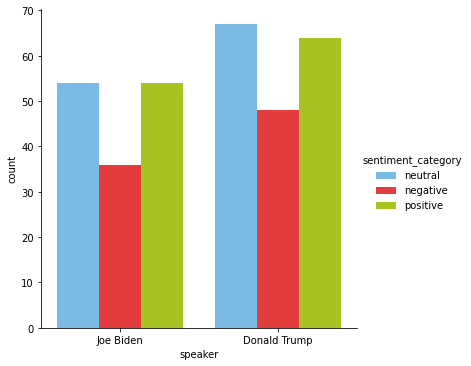

In [ ]:
#sentiment frequency distribution per news category
fc = sns.factorplot(x="speaker", hue="sentiment_category", 
                    data=df_tb2, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

* Donald Trump has more negative and positive sentences.

In [ ]:
print("Most positive sentiment score of Donald Trump is:",(df_tb2[df_tb2["speaker"]=="Donald Trump"]["sentiment_score"].max()))
print("Most negative sentiment score of Donald Trump is:",(df_tb2[df_tb2["speaker"]=="Donald Trump"]["sentiment_score"].min()))

print("Most positive sentiment score of Joe Biden is:",(df_tb2[df_tb2["speaker"]=="Joe Biden"]["sentiment_score"].max()))
print("Most negative sentiment score of Joe Biden is:",(df_tb2[df_tb2["speaker"]=="Joe Biden"]["sentiment_score"].min()))

Most positive sentiment score of Donald Trump is: 0.8
Most negative sentiment score of Donald Trump is: -0.6
Most positive sentiment score of Joe Biden is: 1.0
Most negative sentiment score of Joe Biden is: -0.7


* Most positive and negative sentences of Donald Trump.

In [ ]:
pos_idx = df_tb2[(df_tb2.speaker=='Donald Trump') & (df_tb2.sentiment_score == 0.8)].index[0]
neg_idx = df_tb2[(df_tb2.speaker=='Donald Trump') & (df_tb2.sentiment_score == -0.519)].index[0]

print('*Most Negative Speech of Donald Trump:*', second_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Donald Trump:*', second_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Donald Trump:* … deep down in the IRS, they treat me horribly. We made a deal, it was all settled until I decide to run for president. I get treated very badly by the IRS, very unfairly, but we had a deal all done. As soon as we’re completed with the deal, I want to release it, but I have paid millions and millions of dollars and it’s worse than paying. I paid in advance. It’s called prepaying your taxes. I paid [crosstalk 00:04:32].

*Most Positive Speech of Donald Trump:* China pays 28 billion, and you know what they did to pay it, Joe? They devalued their currency and they also paid up, and you know got the money? Our farmers, our great farmers, because they were targeted. You never charged them anything. Also, I charged them 25% on dumped steel, because they were killing our steel industry. We were not going to have a steel industry.


* Most positive and negative sentences of Joe Biden.

In [ ]:
pos_idx = df_tb2[(df_tb2.speaker=='Joe Biden') & (df_tb2.sentiment_score == 1)].index[0]
neg_idx = df_tb2[(df_tb2.speaker=='Joe Biden') & (df_tb2.sentiment_score == -0.7)].index[0]

print('*Most Negative Speech of Joe Biden:*', second_debate.iloc[neg_idx][['text']][0])
print()
print('*Most Positive Speech of Joe Biden:*', second_debate.iloc[pos_idx][['text']][0])

*Most Negative Speech of Joe Biden:* Children are brought here by coyotes and lots of bad people, cartels…

*Most Positive Speech of Joe Biden:* It’s all a pipe dream, but you know what we’ll do? We’re going to have the greatest economy in the world, but if you want to kill the economy, get rid of your oil industry you want. And what about fracking?


In [ ]:
df_tb2[df_tb2["speaker"]=="Joe Biden"]["sentiment_score"].sort_values(ascending=True)

178   -0.700
144   -0.667
79    -0.500
64    -0.400
181   -0.379
       ...  
542      NaN
545      NaN
548      NaN
557      NaN
559      NaN
Name: sentiment_score, Length: 249, dtype: float64

In [ ]:
df_tb2[df_tb2["speaker"]=="Donald Trump"]["sentiment_score"].sort_values(ascending=True)

265   -0.600
65    -0.519
140   -0.500
191   -0.500
187   -0.400
       ...  
556      NaN
558      NaN
560      NaN
561      NaN
562      NaN
Name: sentiment_score, Length: 314, dtype: float64

## Model Evaluation

### 1st Presidential Debate

In [ ]:
true_labels_1=sentiment_category_1

In [ ]:
true_labels_1[:5]

['neutral', 'neutral', 'neutral', 'positive', 'positive']

In [ ]:
predicted_labels_1=sentiment_category_tb_1

In [ ]:
predicted_labels_1[:5]

['neutral', 'neutral', 'neutral', 'positive', 'positive']

In [ ]:
#Comparing sentiment predictions across models
from sklearn import metrics

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    return cm_frame 

In [ ]:
display_confusion_matrix(true_labels_1, predicted_labels_1, classes=['negative', 'neutral', 'positive'])

Predicted:                 
                   negative neutral positive
Actual: negative         51      28       39
        neutral          20     208       56
        positive         31      38       92

In the preceding table, the **‘Actual’** labels are predictions from the **Afinn** sentiment analyzer and the **‘Predicted’** labels are predictions from **TextBlob**.

### 2nd Presidential Debate

In [ ]:
true_labels_2=sentiment_category_2

In [ ]:
true_labels_2[:5]

['neutral', 'negative', 'positive', 'positive', 'negative']

In [ ]:
predicted_labels_2=sentiment_category_tb_2

In [ ]:
predicted_labels_2[:5]

['neutral', 'negative', 'negative', 'positive', 'positive']

In [ ]:
#Comparing sentiment predictions across models
from sklearn import metrics

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    return cm_frame 

In [ ]:
display_confusion_matrix(true_labels_2, predicted_labels_2, classes=['negative', 'neutral', 'positive'])

Predicted:                 
                   negative neutral positive
Actual: negative         49      18       35
        neutral          21      90       23
        positive         14      13       60

In the preceding table, the **‘Actual’** labels are predictions from the **Afinn** sentiment analyzer and the **‘Predicted’** labels are predictions from **TextBlob**.